# K-Nearest Neighbors (Meme Offense Prediction)

## Penjelasan

### Tujuan

Membuat model machine learning yang dapat memprediksi kategori meme apakah termasuk meme ofensif atau tidak ofensif, menggunakan algoritma K-Nearest Neighbors (KNN)

### Deskripsi Kolom

- ***image_path*** = nama file dari image meme
- ***sentence*** = kalimat atau pesan meme
- ***label (target)*** = kategori meme (0 = Tidak ofensif, 1 = Ofensif)

## A. Data Preparation

### A.1 Import Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

list_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

kamus_singkatan = {
    "u": "you", "ur": "your", "r": "are", "n": "and", "d": "the",
    "c": "see", "lol": "laughing out loud"
}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### A.2 Load Data

In [82]:
try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    print('Berhasil Membaca Data')
except Exception as e:
    print('Gagal Membaca Data')

Berhasil Membaca Data


In [83]:
print("Data Train: ", (len(df_train)))
print("Data Test: ", (len(df_test)))

Data Train:  555
Data Test:  185


### A.3 Melihat Dimensi Data Kedua Dataframe

In [84]:
df_train.shape

(555, 3)

In [85]:
df_test.shape

(185, 2)

### A.4 Melihat Informasi Data Kedua Dataframe

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  555 non-null    object
 1   sentence    555 non-null    object
 2   label       555 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 13.1+ KB


In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  185 non-null    object
 1   sentence    185 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


### A.5 Melihat Statistik Data Kedua Dataframe

#### Belum ada statistik dikarenakan data berbentuk object

### A.6 Melihat 5 Data Teratas Kedua Dataframe 

In [88]:
df_train.head()

,image_path,sentence,label
0,0.png,I do n't vote Republican or Democrat . Choosin...,0
1,1.png,"98 % 12:55 PM LTE K Daddy 02/26/2016 Fri FYI ,...",0
2,2.png,HEY GIRL EVERYTIME SOMEONE DECIDESTO VOTE FOR ...,0
3,3.png,Anonymous ( ID : FaNLvGay 09/30/16 ( Fri ) 00:...,0
4,4.png,Manny Loko Jimenez This offends me as a vegan ...,0


In [89]:
df_test.head()

,image_path,sentence
0,555.png,Donald Trump 's hair looks like someone tried ...
1,556.png,FEE Can you describe the individuals who attac...
2,557.png,HUMP TRUMP LHP TRUMP E TRUMP TRUMP TRUMP TRU M...
3,558.png,"File : bernie sanders gif ( 1.68 MB , 290x246 ..."
4,559.png,R/ENOUGH JILL STEIN SPAM comments If this gets...


### A.7 Melihat Data Duplikat dari Kedua Dataframe

In [90]:
df_train.duplicated().sum()

np.int64(0)

In [91]:
df_test.duplicated().sum()

np.int64(0)

### A.8 Melihat Data Hilang dari Kedua Dataframe

In [92]:
df_train.isna().sum()

image_path    0
sentence      0
label         0
dtype: int64

In [93]:
df_test.isna().sum()

image_path    0
sentence      0
dtype: int64

### A.9 Melihat Data Outlier

#### Tidak ada data outlier dikarenakan data berbentuk object dan data merupakan teks / pesan

## B. Data Preprocessing

### B.1 Cek Label / Target

In [94]:
df_train['label'].value_counts()

label
0    330
1    225
Name: count, dtype: int64

### B.2 Mapping Label untuk EDA

In [95]:
label_mapping = {0 : 'Tidak Ofensif', 1 : 'Ofensif'}

df_train['label_map'] = df_train['label'].map(label_mapping)

## C. Text Preprocessing

### C.1 Linguistic Processing (Bahasa Inggris)

In [96]:
def linguistic_processing_english(list_of_words):
    clean_words = []
    for word in list_of_words:
    
        word = kamus_singkatan.get(word, word)
        # 1. Stopword Removal
        if word not in list_stopwords:
            
            # 2. Lemmatization
            lemma_word = lemmatizer.lemmatize(word)
            clean_words.append(lemma_word)
            
    return " ".join(clean_words)

### C.2 Preprocess Text

In [97]:
def preprocess_text(text_series):
    # 1. Case Folding/Normalization (Jadikan huruf kecil)
    # 2. Text Cleaning (Hapus angka/simbol aneh)
    # 3. Remove Punctuation (Hapus tanda baca)
    # 4. Tokenization (Split jadi list kata)
    temp_tokens = text_series.str.lower().str.replace(r'[^a-z\s]', ' ', regex=True).str.split()
    
    # Linguistic Processing Bahasa Inggris (NLTK)
    return temp_tokens.apply(linguistic_processing_english)

df_train['clean_sentence'] = preprocess_text(df_train['sentence'])

In [98]:
df_train['clean_sentence'].head()

0    vote republican democrat choosing sin always w...
1    pm lte k daddy fri fyi caught car full boy ste...
2    hey girl everytime someone decidesto vote bern...
3    anonymous id fanlvgay fri hillary former secre...
4    manny loko jimenez offends vegan transgender a...
Name: clean_sentence, dtype: object

### C.3 Rumus TF-IDF

#### Membuat Kamus

In [99]:
corpus = df_train['clean_sentence'].apply(lambda x: str(x).split()).tolist()
N = len(corpus)

#### Menghitung TF (Term Frequency)

In [100]:
tf_data = []  # List 

for doc in corpus:
    len_doc = len(doc)
    doc_tf = {}  # Wadah per dokumen 
    
    # Cuma hitung kalau ada isinya
    if len_doc > 0:
        word_freq = {}
        for w in doc:
            word_freq[w] = word_freq.get(w, 0) + 1
        
        for word, freq in word_freq.items():
            doc_tf[word] = freq / len_doc
    
    # Append agar jumlah tf_data sama persis dengan jumlah corpus (N)
    tf_data.append(doc_tf)

#### Menghitung IDF (Inverse Document Frequency)

In [101]:
df_counts = {}

for doc in corpus:
    # Pake unique biar kata yg muncul 2x di 1 dokumen tetep dihitung 1
    unique_words = np.unique(doc) 
    for word in unique_words:
        df_counts[word] = df_counts.get(word, 0) + 1

# Hitung Nilai IDF
idf_dict = {}
for word, count in df_counts.items():
    # Pake log10 dan smoothing (+1)
    idf_dict[word] = np.log10(N / (count + 1))

#### Menghitung TF-IDF

In [102]:
tfidf_data = [] # List hasil akhir
keyword_scores = {} #  akumulasi visualisasi nanti

# Loop setiap dokumen lagi
for i in range(N):
    doc_tfidf = {}
    
    # Ambil TF dokumen ke-i 
    current_tf = tf_data[i]
    
    for word, tf_val in current_tf.items():
        # Ambil IDF kata tersebut 
        idf_val = idf_dict.get(word, 0)
        
        # KALIIN (TF * IDF)
        score = tf_val * idf_val
        
        # Simpan
        doc_tfidf[word] = score
        
        # Akumulasi Visualisasi 
        keyword_scores[word] = keyword_scores.get(word, 0) + score
        
    tfidf_data.append(doc_tfidf)

## D. Exploratory Data Analysis (EDA)

### D.1 Univariate Analysis

#### Distribusi Kolom Target 

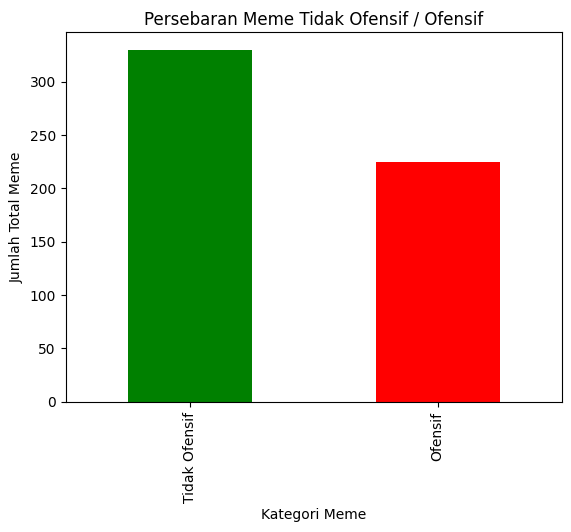

In [103]:
df_train['label_map'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Persebaran Meme Tidak Ofensif / Ofensif")
plt.xlabel("Kategori Meme")
plt.ylabel("Jumlah Total Meme")
plt.show()

#### Panjang Kata Dari 5 Kalimat Meme Teratas

In [104]:
df_train['len_row'] = df_train['sentence'].str.len()

In [105]:
df_train['len_row'].head()

0    142
1    475
2     67
3    698
4    554
Name: len_row, dtype: int64

#### Visualisasi Word Cloud

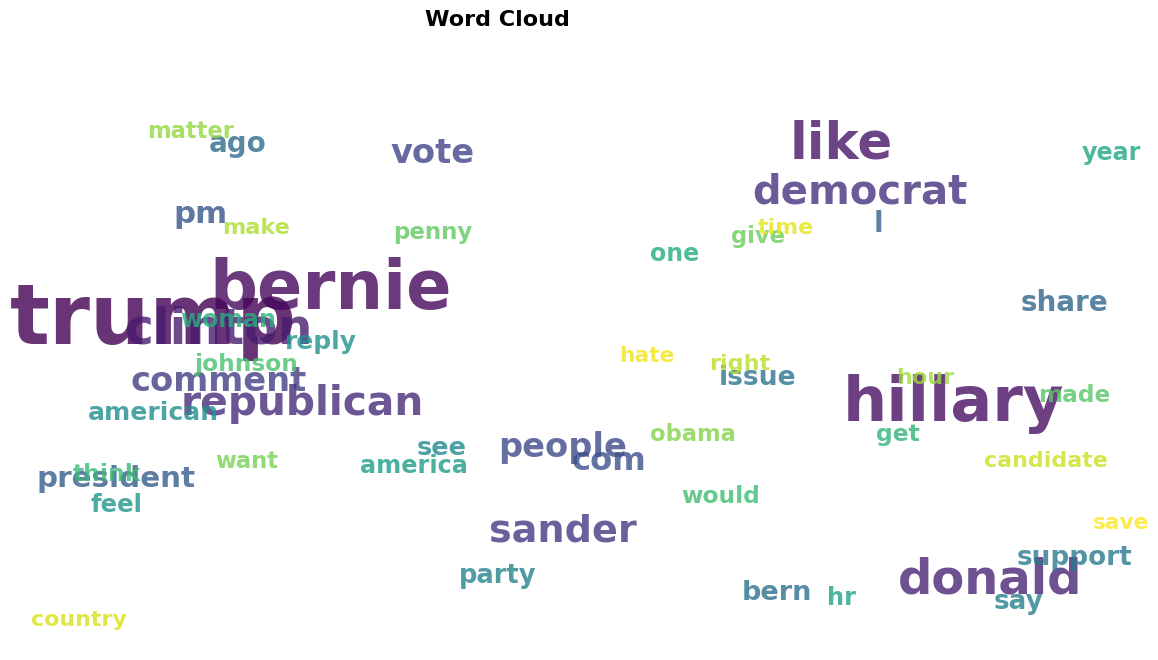

In [106]:
top_words = pd.Series(' '.join(df_train['clean_sentence']).split()).value_counts().head(50)

# SETUP PLOT
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title('Word Cloud', fontsize=16, fontweight='bold')

# Bikin warna gradasi otomatis 
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# LOOP PLOTTING 
max_freq = top_words.iloc[0]

# zip() biar kita loop, frekuensi, dan warnanya barengan
for (word, freq), color in zip(top_words.items(), colors):
    
    # Hitung ukuran font
    size = (freq / max_freq) * 50 + 10
    
    # Generate posisi X, Y acak pake Numpy 
    x, y = np.random.randint(5, 120, 2)
    
    # Plot Teks
    plt.text(x, y, word, 
             fontsize=size, 
             color=color, 
             ha='center', va='center', 
             alpha=0.8, fontweight='bold')

plt.xlim(0, 100)
plt.ylim(0, 140)
plt.show()

### D.2 Bivariate Analysis

#### Panjang Kata Setiap Kategori Meme

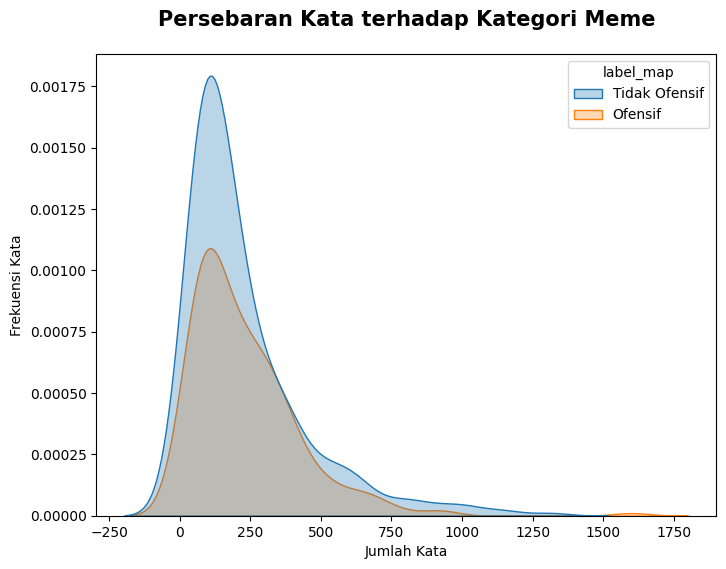

In [107]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_train, x='len_row', hue='label_map', fill=True, alpha = 0.3)
plt.title("Persebaran Kata terhadap Kategori Meme", fontsize=15, fontweight ='bold', pad=20)
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi Kata")
plt.show()

#### Top 10 Kata Teratas Setiap Kategori Meme

In [108]:
top_tidak_ofensif= pd.Series(" ".join(df_train[df_train['label'] == 0]['clean_sentence']).split()).value_counts().head(10)
top_ofensif = pd.Series(" ".join(df_train[df_train['label'] == 1]['clean_sentence']).split()).value_counts().head(10)

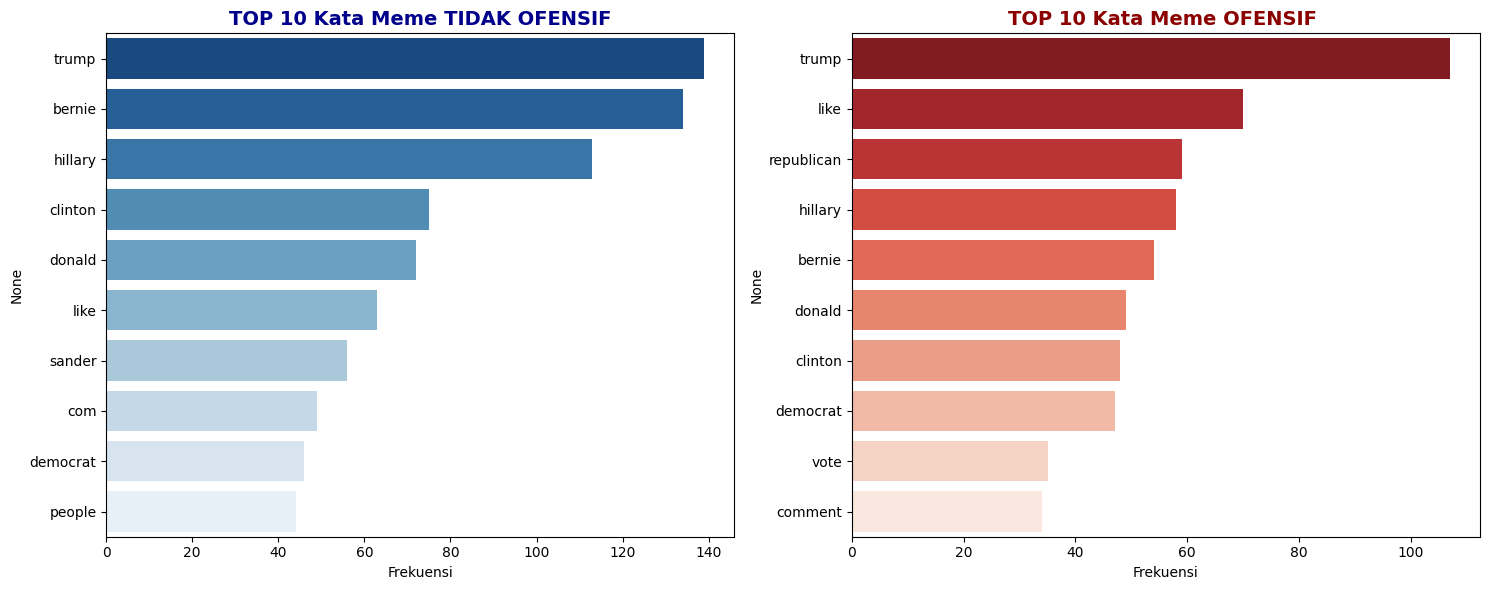

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_tidak_ofensif.values, y=top_tidak_ofensif.index, 
            hue=top_tidak_ofensif.index, palette='Blues_r', legend=False, ax=axes[0])
axes[0].set_title("TOP 10 Kata Meme TIDAK OFENSIF", fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_xlabel("Frekuensi")

sns.barplot(x=top_ofensif.values, y=top_ofensif.index, 
            hue=top_ofensif.index, palette='Reds_r', legend=False, ax=axes[1])
axes[1].set_title("TOP 10 Kata Meme OFENSIF ", fontsize=14, fontweight='bold', color='darkred')
axes[1].set_xlabel("Frekuensi")

plt.tight_layout()
plt.show()

### D.3 TF-IDF Analysis

#### 20 Kata Kunci Paling Berpengaruh Terhadap Target (Hasil TF-IDF)

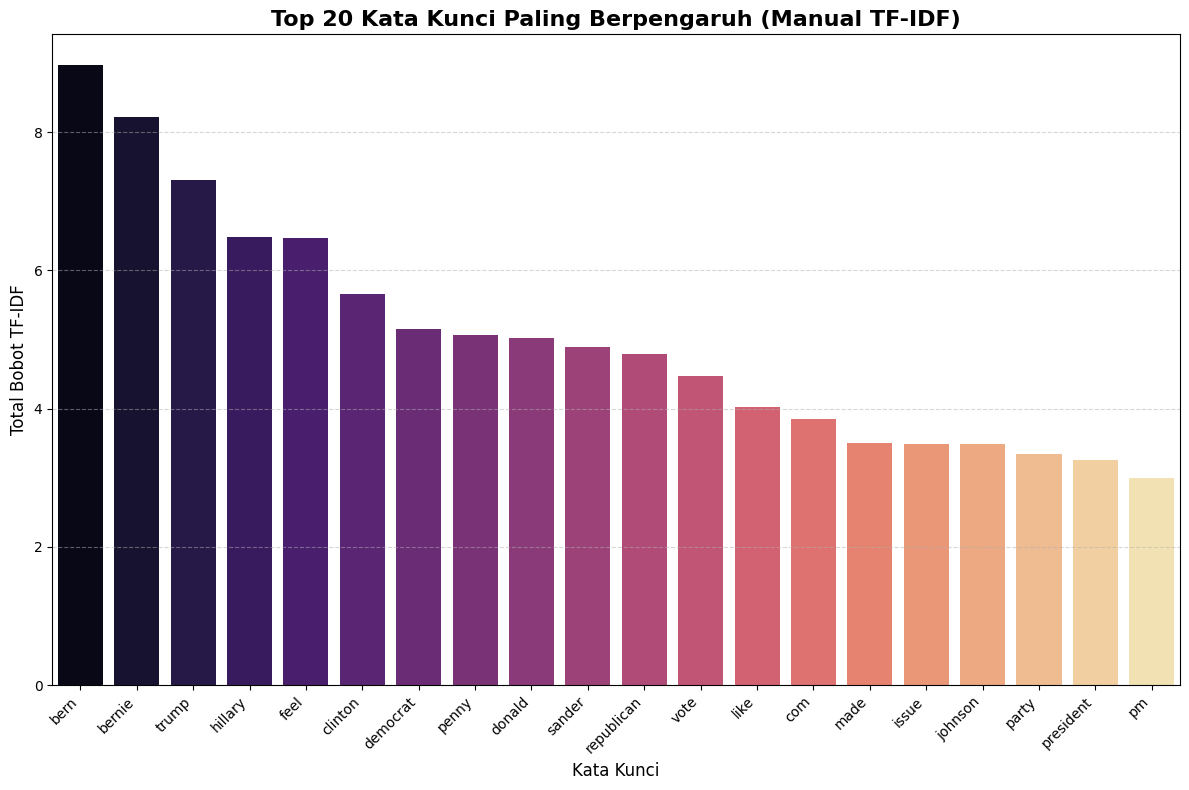


--- Tabel Top 10 Kata Kunci (Data-Driven) ---
No   Kata Kunci      Total Skor TF-IDF
----------------------------------------
1    bern            8.9688
2    bernie          8.2192
3    trump           7.3120
4    hillary         6.4830
5    feel            6.4761
6    clinton         5.6613
7    democrat        5.1534
8    penny           5.0694
9    donald          5.0274
10   sander          4.8920


In [110]:
# A. Menjumlahkan skor kata dari seluruh dokumen
keyword_total_scores = {}

for doc_scores in tfidf_data:
    for word, score in doc_scores.items():
        keyword_total_scores[word] = keyword_total_scores.get(word, 0) + score

# Ambil 20 Kata dengan Skor Tertinggi
# Mengubah dict ke list tuples -> Sort -> Ambil Top 20
sorted_keywords = sorted(keyword_total_scores.items(), key=lambda x: x[1], reverse=True)[:20]

# Pisahkan Kata dan Skornya buat sumbu X dan Y
words = [x[0] for x in sorted_keywords]
scores = [x[1] for x in sorted_keywords]

# C. Plotting (Bar Chart)
plt.figure(figsize=(12, 8))
sns.barplot(x=words, y=scores, palette='magma', hue=words, legend=False)

# Style Grafik 
plt.title('Top 20 Kata Kunci Paling Berpengaruh (Manual TF-IDF)', fontsize=16, fontweight='bold')
plt.xlabel('Kata Kunci', fontsize=12)
plt.ylabel('Total Bobot TF-IDF', fontsize=12)
plt.xticks(rotation=45, ha='right') # Miringin label biar gak tabrakan
plt.grid(axis='y', linestyle='--', alpha=0.5) # Garis bantu tipis
plt.tight_layout()

# Show
plt.show()

# Laporan Hasil 
print("\n--- Tabel Top 10 Kata Kunci (Data-Driven) ---")
print(f"{'No':<4} {'Kata Kunci':<15} {'Total Skor TF-IDF'}")
print("-" * 40)
for i, (w, s) in enumerate(sorted_keywords[:10], 1):
    print(f"{i:<4} {w:<15} {s:.4f}")

### D.4 N-Gram Analysis

#### Membuat Fungsi Bi-Gram (Pengelompokkan 2 Kata)

In [111]:
# Fungsi Bigram 
def generate_bigrams(text_list):
    bigram_list = []
    for text in text_list:
        words = text.split()
        #  ambil kata i dan kata i+1
        # zip(words, words[1:]) buat masangin [A, B, C] jadi (A,B), (B,C)
        if len(words) > 1:
            for i in range(len(words) - 1):
                bigram_list.append(words[i] + " " + words[i+1])
    return bigram_list

# Eksekusi
all_bigrams = generate_bigrams(df_train['clean_sentence'])

# Hitung Frekuensi 
bigram_counts = {}
for bi in all_bigrams:
    bigram_counts[bi] = bigram_counts.get(bi, 0) + 1

# Sorting & Visualisasi
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:20]

#### 20 Bigram Paling Berpengaruh Terhadap Target (Hasil TF-IDF)

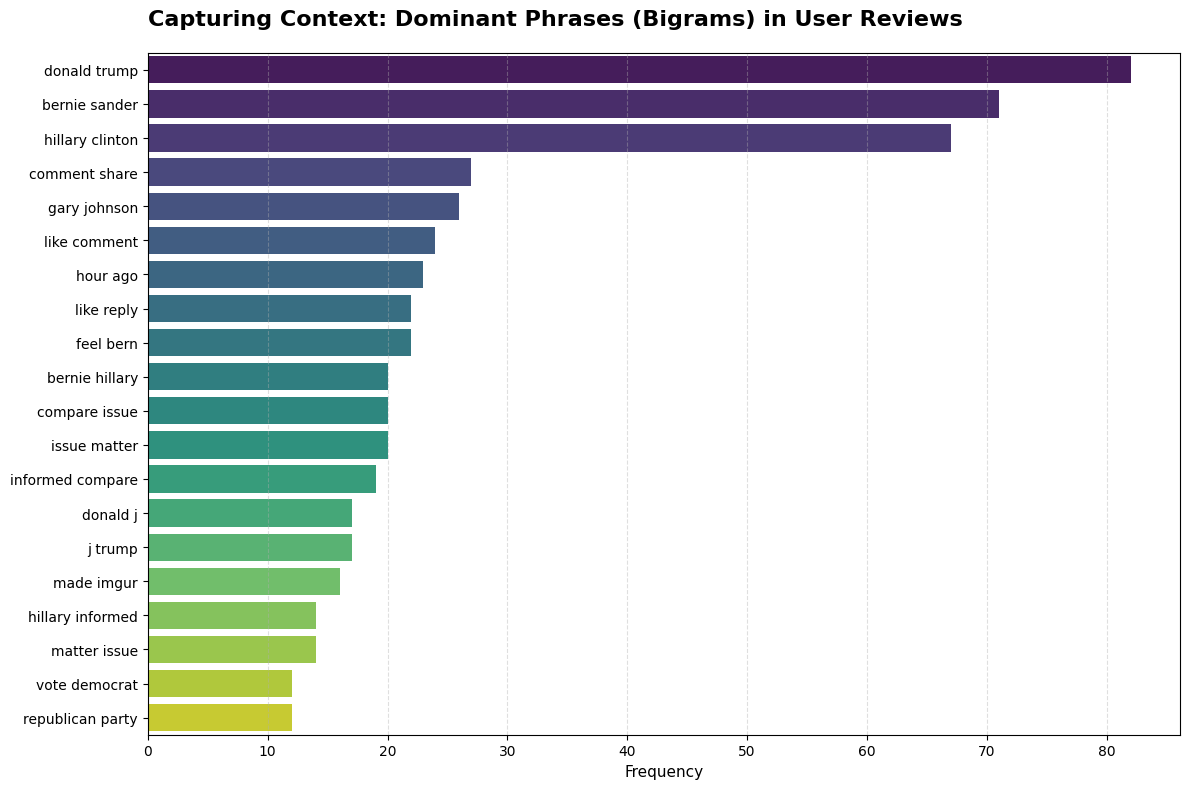

Top 5 Key Phrases:
- donald trump: 82
- bernie sander: 71
- hillary clinton: 67
- comment share: 27
- gary johnson: 26


In [112]:
bi_words = [x[0] for x in sorted_bigrams]
bi_counts = [x[1] for x in sorted_bigrams]

plt.figure(figsize=(12, 8))

# Story Telling
# Judul Utama: Fokus ke Insight/Tujuan
plt.title('Capturing Context: Dominant Phrases (Bigrams) in User Reviews', 
          fontsize=16, fontweight='bold', pad=20, loc='left') 
# loc='left' itu biar mata baca dari kiri atas

sns.barplot(x=bi_counts, y=bi_words, palette='viridis', hue=bi_words, legend=False)

# Label Sumbu: Jangan cuma "Frekuensi", tapi perjelas
plt.xlabel('Frequency', fontsize=11)
plt.ylabel(None) # Ilangin label Y "Pasangan Kata" karena udah jelas itu kata-kata

# Grid tipis biar mata gampang narik garis
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print("Top 5 Key Phrases:")
for w, c in sorted_bigrams[:5]:
    print(f"- {w}: {c}")

## E. Modelling

### E.1 Mengkonversi TF-IDF ke Matrix Numpy

In [113]:
# 1. Buat Vocab
vocab = sorted(keyword_scores, key=keyword_scores.get)
word_to_idx = {w: i for i, w in enumerate(vocab)}

# 2. Buat Matrix Kosong (Semua Data x Kolom)
X_matrix = np.zeros((len(tfidf_data), len(vocab)))

# 3. Isi Matrix-nya
for i, doc in enumerate(tfidf_data):
    for word, val in doc.items():
        if word in word_to_idx:
            X_matrix[i, word_to_idx[word]] = val

### E.2 Normalisasi L2 Untuk Panjang Vektor Kalimat

In [114]:
# 1. Hitung panjang vektor (magnitude) tiap dokumen
norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)

# 2. Bagi setiap baris dengan panjangnya (Biar panjangnya jadi 1)
X_matrix_norm = X_matrix / (norms + 1e-9)

### E.3 Mendifinisikan Variabel Fitur (X) dan Target (y)

In [115]:
X_data = pd.DataFrame(X_matrix_norm, columns=vocab)
y_data = df_train['label']

### E.4 Split Data Train dan Data Test (80 : 20)

In [116]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### E.5 K-Nearest Neighbors

In [117]:
class KNN:
    def __init__(self, k, p, weights):
        self.P = p
        self.K = k
        self.Weights = weights
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, x1, x2):
        # Cosine Distance = 1 - Cosine Similarity
        # Rumus: 1 - (dot_product / (norm_x1 * norm_x2))
        
        # Karena kita sudah Normalisasi L2 sebelumnya (panjang = 1),
        # Rumusnya jadi simpel: 1 - dot_product
        
        # Operasi Dot Product Matrix
        # x1: (N_train, D), x2: (D,) -> result: (N_train,)
        dot_products = np.dot(x1, x2)
        
        # Jarak Cosine (Semakin kecil semakin mirip)
        return 1 - dot_products
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        dists = self.distance(self.X_train, x)
        best_k = np.argsort(dists)[:self.K]
        label_k = self.y_train[best_k]
        
        if self.Weights == 'uniform':
            values, counts = np.unique(label_k, return_counts=True)
            return values[np.argmax(counts)]
        
        elif self.Weights == 'distance':
            weights = 1 / (dists[best_k] + 1e-6)
            vote_scores = {}
            
            for label, weight in zip(label_k, weights):
                vote_scores[label] = vote_scores.get(label, 0) + weight
            return max(vote_scores, key=vote_scores.get)
        

### E.6 Grid Search (Mencari K Optimal, Metode Jarak Optimal, dan Metode Pembobotan Optimal)

#### Grid Search Test Predictions

In [118]:
print("|   K   |   Jarak   |  Accuracy  |    Weights    |")

best_acc = 0
best_params  = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.fit(X_train.values, y_train.values)
            pred = model.predict(X_test.values)
            acc = np.mean(pred == y_test.values)
            
            if p == 1:
                dist = 'Manhattan'
            elif p == 2:
                dist = 'Euclidean'
            else:
                dist = 'Chebyshev'
                
            print(f"|   {k}   | {dist} |    {acc:.2f}    |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w' : w}
                
if best_params['p'] == 1:
    dist_name = 'Manhattan'
elif best_params['p'] == 2:
    dist_name = 'Euclidean'
else:
    dist_name = 'Chebyshev'
print(f"Best K: {best_params['k']} | Best Distance: {dist_name} | Best Weights: {best_params['w']} | Best Accuracy: {best_acc:.2f}")

|   K   |   Jarak   |  Accuracy  |    Weights    |


|   3   | Manhattan |    0.56    |    uniform    |
|   3   | Manhattan |    0.57    |    distance    |
|   3   | Euclidean |    0.56    |    uniform    |
|   3   | Euclidean |    0.57    |    distance    |
|   3   | Chebyshev |    0.56    |    uniform    |
|   3   | Chebyshev |    0.57    |    distance    |
|   5   | Manhattan |    0.53    |    uniform    |
|   5   | Manhattan |    0.54    |    distance    |
|   5   | Euclidean |    0.53    |    uniform    |
|   5   | Euclidean |    0.54    |    distance    |
|   5   | Chebyshev |    0.53    |    uniform    |
|   5   | Chebyshev |    0.54    |    distance    |
|   7   | Manhattan |    0.57    |    uniform    |
|   7   | Manhattan |    0.57    |    distance    |
|   7   | Euclidean |    0.57    |    uniform    |
|   7   | Euclidean |    0.57    |    distance    |
|   7   | Chebyshev |    0.57    |    uniform    |
|   7   | Chebyshev |    0.57    |    distance    |
|   9   | Manhattan |    0.60    |    uniform    |
|   9   | Manhattan | 

#### Grid Search Train Predictions

In [119]:
print("|   K   |   Jarak   |  Akurasi  |    Weights    |")

best_acc = 0
best_params  = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.fit(X_train.values, y_train.values)
            pred = model.predict(X_train.values)
            acc = np.mean(pred == y_train.values)
            
            if p == 1:
                dist = 'Manhattan'
            elif p == 2:
                dist = 'Euclidean'
            else:
                dist = 'Chebyshev'
                
            print(f"|   {k}   | {dist} |    {acc:.2f}    |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w' : w}
                
if best_params['p'] == 1:
    dist_name = 'Manhattan'
elif best_params['p'] == 2:
    dist_name = 'Euclidean'
else:
    dist_name = 'Chebyshev'
print(f"Best K: {best_params['k']} | Best Distance: {dist_name} | Best Weights: {best_params['w']} | Best Accuracy: {best_acc:.2f}")

|   K   |   Jarak   |  Akurasi  |    Weights    |
|   3   | Manhattan |    0.80    |    uniform    |
|   3   | Manhattan |    1.00    |    distance    |
|   3   | Euclidean |    0.80    |    uniform    |
|   3   | Euclidean |    1.00    |    distance    |
|   3   | Chebyshev |    0.80    |    uniform    |
|   3   | Chebyshev |    1.00    |    distance    |
|   5   | Manhattan |    0.76    |    uniform    |
|   5   | Manhattan |    1.00    |    distance    |
|   5   | Euclidean |    0.76    |    uniform    |
|   5   | Euclidean |    1.00    |    distance    |
|   5   | Chebyshev |    0.76    |    uniform    |
|   5   | Chebyshev |    1.00    |    distance    |
|   7   | Manhattan |    0.74    |    uniform    |
|   7   | Manhattan |    1.00    |    distance    |
|   7   | Euclidean |    0.74    |    uniform    |
|   7   | Euclidean |    1.00    |    distance    |
|   7   | Chebyshev |    0.74    |    uniform    |
|   7   | Chebyshev |    1.00    |    distance    |
|   9   | Manhattan |  